# Assessment 1 answers
1). The MSE of the linear regression is greater than that of a tuned neural network.<br>
2). When adding 5 hidden layers with 128 neurons each, the MSE is reduced from the neural network example, but not from the linear regression example. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [7]:
%tensorflow_version 1.x
from keras.datasets import boston_housing

UsageError: Line magic function `%tensorflow_version` not found.


In [8]:
#scikit version has descriptions:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
#Format: Dictionary 
# print(boston.keys())
#Size it up
print(boston.data.shape)
#What are the 13 features?
print(boston.feature_names)

boston.target.shape

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


(506,)

In [10]:
#info on the data.
#pandas are pretty. 
df = pd.DataFrame(boston.data)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
X = boston.data
y = boston.target
print(X.shape, y.shape)

X -= X.mean(0)
X /= X.std(0)

df = pd.DataFrame(X)
df.describe()


(506, 13) (506,)


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-5.616939e-17,-3.510587e-18,-3.117401e-15,-2.808469e-17,2.724215e-15,-1.147260e-14,-1.151472e-15,7.582867e-16,0.000000,5.616939e-17,-1.022283e-14,8.607958e-15,-5.897786e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-0.982843,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-0.637962,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-0.523001,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, train_size=0.8)

print(Xtrain.shape, ytrain.shape)

(404, 13) (404,)


In [13]:
print("Attributes:\n", Xtrain[:3], "\n Prices:\n", ytrain[:3])

Attributes:
 [[ 1.32780421 -0.48772236  1.01599907 -0.27259857  0.51229565 -1.39706929
   1.02148094 -0.80543822  1.66124525  1.53092646  0.80657583 -0.07887794
   1.7181012 ]
 [-0.34750602 -0.48772236 -0.43725801 -0.27259857 -0.14421743 -0.64200019
  -0.42939039  0.33444943 -0.6379618  -0.6012761   1.17646583  0.42701755
  -0.5863558 ]
 [-0.41648392  1.01446252 -0.74074945 -0.27259857 -1.00891427 -0.36134243
  -1.61000138  1.35273767 -0.98284286 -0.61909395 -0.71922039  0.06113692
  -0.67606702]] 
 Prices:
 [12.  19.9 19.4]


In [34]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

#SciKit Lin Reg using the train/test split:
#1. Create a model
#2. Train
#3. Predict

#ME
model = LinearRegression(fit_intercept=True)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)


MSE Linear Regression: 24.29
MAE Linear Regression: 3.19


Text(0.5, 1.0, 'Boston Housing True vs Predicted prices')

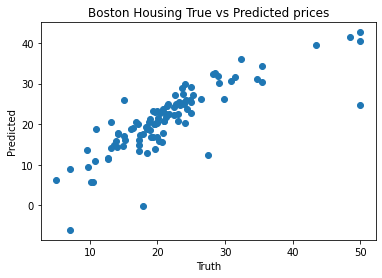

In [36]:
#Calculate error and plot
mse = mean_squared_error(ytest, y_model)
mae = mean_absolute_error(ytest, y_model)
print("MSE Linear Regression: %.2f" % mse)
print("MAE Linear Regression: %.2f" % mae)

#compare labels
plt.scatter(ytest, y_model)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.title("Boston Housing True vs Predicted prices")

In [16]:
# Model weights:
print("Model intercept:", model.intercept_)
print("Model slopes:    ", model.coef_)

Model intercept: 22.485268239316913
Model slopes:     [-0.97149423  0.70155562  0.27675212  0.70653152 -1.99143043  3.11571836
 -0.17706021 -3.04577065  2.28278471 -1.79260468 -1.97995351  1.12649864
 -3.62814937]


In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#ME
model = make_pipeline(PolynomialFeatures(2), LinearRegression(fit_intercept=True))

MSE Linear Regression: 14.25


Text(0.5, 1.0, 'Boston Housing True vs Predicted prices')

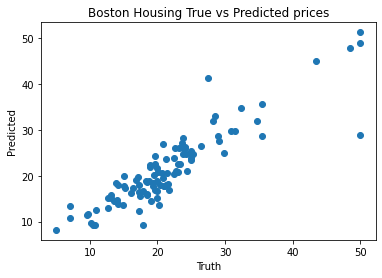

In [18]:
#train and evaluate 

model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

#Calculate error and plot
mse = mean_squared_error(ytest, y_model)
print("MSE Linear Regression: %.2f" % mse)

#compare labels
plt.scatter(ytest, y_model)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.title("Boston Housing True vs Predicted prices")

In [19]:
from keras import models
from keras import layers

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [20]:
# define model

#Dense is a fully-connected NN: activation(dot(input, kernel) + bias)

def ex_model():
	# Add layers in given order
  model = Sequential() 
  #Seq: indicates we want to define the NN layer by layer;
  #each layer stacks on top of the next. 
  #comes with fit,eval,predict. (and corresponding generators)
  
  model.add(Dense(13, input_shape=(Xtrain.shape[1],), activation='relu'))
  #we only need input size for the first layer. After that, it will auto-fill.

  model.add(Dense(1))
  #no actications for the output layer. used for predicting a continous value.
  # Compile model
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
  return model


Epoch 1/20
404/404 [==============================] - 2s 4ms/step - loss: 533.8841 - mae: 21.3547
Epoch 2/20
404/404 [==============================] - 1s 3ms/step - loss: 321.5730 - mae: 16.0975
Epoch 3/20
404/404 [==============================] - 1s 3ms/step - loss: 149.1968 - mae: 9.9407
Epoch 4/20
404/404 [==============================] - 1s 2ms/step - loss: 76.0539 - mae: 6.5941
Epoch 5/20
404/404 [==============================] - 1s 3ms/step - loss: 49.4227 - mae: 5.1408
Epoch 6/20
404/404 [==============================] - 1s 3ms/step - loss: 38.1626 - mae: 4.4720
Epoch 7/20
404/404 [==============================] - 1s 4ms/step - loss: 32.8650 - mae: 4.1047: 1s - loss: 18.18
Epoch 8/20
404/404 [==============================] - 1s 2ms/step - loss: 29.8777 - mae: 3.9260
Epoch 9/20
404/404 [==============================] - 1s 3ms/step - loss: 27.9486 - mae: 3.7999
Epoch 10/20
404/404 [==============================] - 2s 4ms/step - loss: 26.2881 - mae: 3.6960
Epoch 11/20
404/

Text(0.5, 1.0, 'Boston Housing True vs Predicted prices')

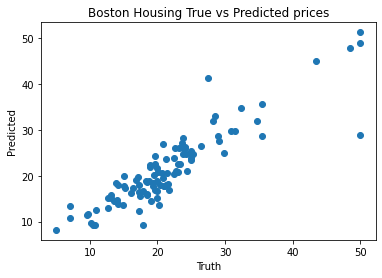

In [29]:
model = ex_model()
ne = 20 #number of train loops 50% increase in epochs
model.fit(Xtrain, ytrain, epochs=ne, batch_size=1, verbose=1)
#see performance on test data using trained model
y_nn = model.predict(Xtest)

#Calculate error and plot
mse = mean_squared_error(ytest, y_nn)
print("MSE Keras example: %.2f" % mse)

#compare labels
plt.scatter(ytest, y_model)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.title("Boston Housing True vs Predicted prices")

In [22]:
#alternative approach with cross-validation
#model object
# estimator = KerasRegressor(build_fn=ex_model, epochs=100, batch_size=5, verbose=1)
# 
# cvf = KFold(n_splits=2)
# results = cross_val_score(estimator, X, y, cv=cvf)
# print("Results: %.2f (+/-%.2f) MSE" % (results.mean(), results.std()))

# Results: -88.81 (46.90) MSE

In [23]:
weights, bias = model.layers[1].get_weights()

print('Weights size: \n', weights.shape)
      
print('Weights: \n', weights,'\n Bias: \n' ,bias)

Weights size: 
 (13, 1)
Weights: 
 [[ 1.5146264 ]
 [-0.32914343]
 [ 0.9869111 ]
 [-0.24492453]
 [-0.06555422]
 [ 1.4089354 ]
 [ 1.2235569 ]
 [ 0.9847275 ]
 [ 1.1426797 ]
 [ 0.9184187 ]
 [-0.5684756 ]
 [-0.87922686]
 [ 1.4094754 ]] 
 Bias: 
 [1.0790472]


Epoch 1/10
404/404 [==============================] - 12s 31ms/step - loss: 598.2871 - mae: 22.6133
Epoch 2/10
404/404 [==============================] - 6s 15ms/step - loss: 581.6572 - mae: 22.2453
Epoch 3/10
404/404 [==============================] - 6s 15ms/step - loss: 565.4316 - mae: 21.8750
Epoch 4/10
404/404 [==============================] - 6s 15ms/step - loss: 549.5937 - mae: 21.5113
Epoch 5/10
404/404 [==============================] - 6s 15ms/step - loss: 534.0960 - mae: 21.1506
Epoch 6/10
404/404 [==============================] - 6s 15ms/step - loss: 518.9628 - mae: 20.7870
Epoch 7/10
404/404 [==============================] - 6s 15ms/step - loss: 504.1993 - mae: 20.4301
Epoch 8/10
404/404 [==============================] - 6s 15ms/step - loss: 489.7731 - mae: 20.0704
Epoch 9/10
404/404 [==============================] - 5s 14ms/step - loss: 475.7064 - mae: 19.7170
Epoch 10/10
404/404 [==============================] - 4s 9ms/step - loss: 461.9511 - mae: 19.3633
MSE deep 

Text(0.5, 1.0, 'Boston Housing True vs Predicted prices')

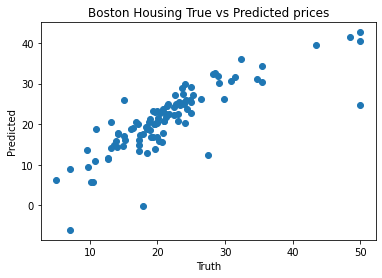

In [41]:
def deep_model():
	# Add layers in given order
    model = Sequential()
    model.add(Dense(13, input_shape=(Xtrain.shape[1],), activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    return model


ne = 10 #number of train loops

model = deep_model()
model.fit(Xtrain, ytrain, epochs=ne, batch_size=1, verbose=1)
#see performance on test data using trained model
y_nn = model.predict(Xtest)

#Calculate error and plot
mse = mean_squared_error(ytest, y_nn)
print("MSE deep network: %.2f" % mse)

#compare labels
plt.scatter(ytest, y_model)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.title("Boston Housing True vs Predicted prices")

Epoch 1/10
404/404 [==============================] - 2s 4ms/step - loss: 377.5724 - mae: 17.3909
Epoch 2/10
404/404 [==============================] - 1s 2ms/step - loss: 107.3506 - mae: 7.9163
Epoch 3/10
404/404 [==============================] - 1s 2ms/step - loss: 39.7412 - mae: 4.5392
Epoch 4/10
404/404 [==============================] - 1s 2ms/step - loss: 29.9578 - mae: 3.9566
Epoch 5/10
404/404 [==============================] - 1s 3ms/step - loss: 25.2395 - mae: 3.6679
Epoch 6/10
404/404 [==============================] - 1s 3ms/step - loss: 22.1921 - mae: 3.4469
Epoch 7/10
404/404 [==============================] - 1s 3ms/step - loss: 19.8906 - mae: 3.2636
Epoch 8/10
404/404 [==============================] - 1s 3ms/step - loss: 18.5280 - mae: 3.1984
Epoch 9/10
404/404 [==============================] - 1s 3ms/step - loss: 16.7815 - mae: 2.9807
Epoch 10/10
404/404 [==============================] - 1s 3ms/step - loss: 15.7280 - mae: 2.9223
MSE wide network: 16.48


Text(0.5, 1.0, 'Boston Housing True vs Predicted prices')

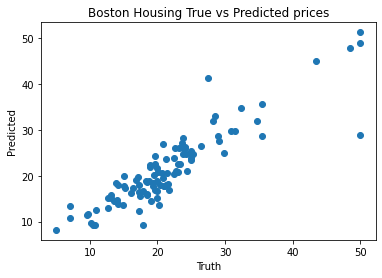

In [33]:
def wide_model():
	# Add layers in given order
    model = Sequential()
    model.add(Dense(30, input_shape=(Xtrain.shape[1],), activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    return model


ne = 10 #number of train loops

model = wide_model()
model.fit(Xtrain, ytrain, epochs=ne, batch_size=1, verbose=1)
#see performance on test data using trained model
y_nn = model.predict(Xtest)

#Calculate error and plot
mse = mean_squared_error(ytest, y_nn)
print("MSE wide network: %.2f" % mse)

#compare labels
plt.scatter(ytest, y_model)
plt.xlabel("Truth")
plt.ylabel("Predicted")
plt.title("Boston Housing True vs Predicted prices")